In [1]:
#Packages
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score

#Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

#Preprocessing 
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler

#Decomposers
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

#Dataframe for visualisation
import pandas as pd

#Classifier for part 5 
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Flatten, GlobalAveragePooling2D, InputLayer, Activation
from keras.optimizers import Adam, RMSprop
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers


Using TensorFlow backend.


## Part 1

Part 1.1 <br>
Opening and preprocessing the files, there are 3000 training examples and 5000 testing examples.

In [2]:
Xtest = open('Xtest.csv','r')
Ytrain = open('Ytrain.csv','r')
Xtrain = open('Xtrain.csv','r')

test_count = 0
test_Lines = []
for line in Xtest:
    l=[]
    test_count += 1
    line = line.split()
    for i in line:
        l.append(int(i))
    test_Lines.append(l)


Y = []
for line in Ytrain:
    if line == '-1\n':
        Y.append(-1)
    else:
        Y.append(1)
    
train_count = 0
train_Lines = []
for line in Xtrain:
    train_count += 1
    l = []
    line = line.split()
    for i in line:
        l.append(int(i))
    train_Lines.append(l)


print('training count:',train_count)
print('testing counts:',test_count)

training count: 3000
testing counts: 5000


This part of my code displays 10 randomly selected images.

Image number: 1258


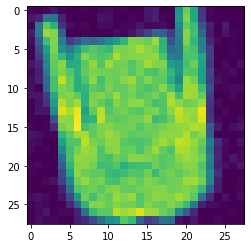

Image number: 2649


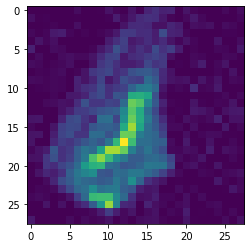

Image number: 396


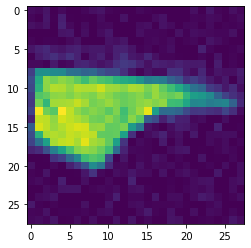

Image number: 2189


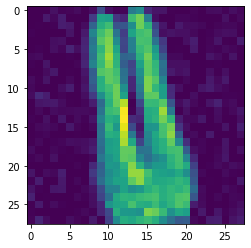

Image number: 93


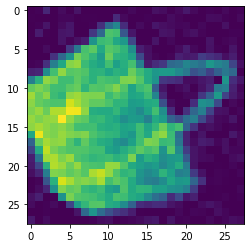

Image number: 1217


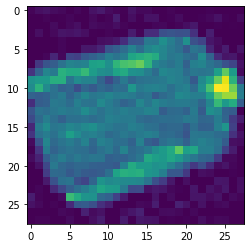

Image number: 1882


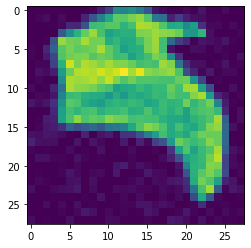

Image number: 1545


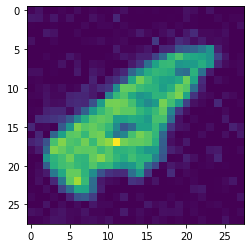

Image number: 992


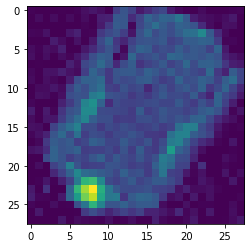

Image number: 1779


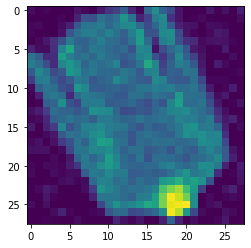

In [3]:
for i in range(10):
    number = int(random.random()*3000)
    print('Image number:',number)
    image = train_Lines[number]
    image = np.reshape(image,(28,28))
    plt.imshow(image)
    plt.show()
    

Part 1.2<br>
This counts the number of positive and negative examples in our training data. As can be seen there are 1179 positive examples and 1821 negative examples.

In [4]:
positive = 0
negative = 0
count=0
for i in range(len(Y)):
    if Y[i] == -1:
        negative += 1
    elif Y[i] == 1:
        positive += 1
    else:
        print('Oh no')
        break
print('number of positive:', positive)
print('number of negative:', negative)


number of positive: 1179
number of negative: 1821


Part 1.3<br>
The best metric to decide which method performs the best is accuracy.<br>
The accuracy is useful when the class sizes are similar and there is no importance to which way round misclassification occurs.
AUC_ROC is useful when there a class that has some significance i.e. if it's important to predict a class correctly for example in medical diagnosis, so over predicting positive so more tests can be carried out is better than totally missing a potential occurrence of an illness. AUC_ROC also works well on balanced data.
AUC_PR is useful when there is a large difference in size between the classes. <br>

As in this case it is an approximate 60% split in the data and no class should be predicted more over another hence I believe accuracy to be the best metric to measure the data by.


Part 1.4/5<br>
For a random class prediction for each of the training data you would expect that each of the predictions would have a 50% chance of being correct. This is because there are two possible categories for prediction 1 and -1, this is demonstrated with the code below that shows that the accuracy is approximately 50%. However, the AUC_ROC is approximatly 50% as would be expected with a totally random classifier. The AUC_PR is over 50% at 54.7% showing the imbalance in the data.

In [5]:
#Using scikit-learns dummy clssifier that randomly assigns a value to each testing sample

#Formats the data in a way that can be used by the classifiers
X = np.array(train_Lines)
y = np.array(Y)

skf = StratifiedKFold(n_splits=5, random_state=1, shuffle = True) #can change these values
skf.get_n_splits(X, y)
ac=[]
PR=[]
ROC=[]
for train_index, test_index in skf.split(X, y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

#Using the last fold of a 5 fold stratified splitting for training and testing

    model = DummyClassifier(strategy="uniform")
    model.fit(X_train, y_train)

    ac.append(model.score(X_test, y_test))

    pred = model.predict(X_test)
    # calculate scores
    auc_roc = roc_auc_score(y_test, pred)
    ROC.append(auc_roc)

    precision, recall, _ = precision_recall_curve(y_test, pred)
    PR.append(auc(recall, precision))
print('Accuracy :', np.mean(ac))
print('AUC_ROC :', np.mean(ROC))
print('AUC_PR :', np.mean(PR))

Accuracy : 0.4803333333333333
AUC_ROC : 0.49994883214785
AUC_PR : 0.5365457001780662


## Part 2 
Part 2.1 <br>
This shows the accuracy and AUC_ROC and AUC_PR scores for each fold of the stratified k fold splitter with five folds.

In [6]:
#Formats the data in a way that can be used by the classifiers
X = np.array(train_Lines)
y = np.array(Y)

#Splits the data using stratified 5 fold splitting
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

print(skf)

accuracy = []
ROC = []
PR = []

for train_index, test_index in skf.split(X, y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    print('Accuracy :', model.score(X_test,y_test))
    accuracy.append(model.score(X_test,y_test))
    
    pred = model.predict(X_test)
    # calculate scores
    auc_roc = roc_auc_score(y_test, pred)
    print('AUC_ROC :', auc_roc)

    precision, recall, _ = precision_recall_curve(y_test, pred)
    print('AUC_PR :', auc(recall, precision))
    
    ROC.append(auc_roc)
    PR.append(auc(recall, precision))
    

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Accuracy : 0.7783333333333333
AUC_ROC : 0.7696265598807971
AUC_PR : 0.7745865860233959
Accuracy : 0.7533333333333333
AUC_ROC : 0.7400819519463588
AUC_PR : 0.7471439703876874
Accuracy : 0.74
AUC_ROC : 0.7380331532873905
AUC_PR : 0.743497688751926
Accuracy : 0.7583333333333333
AUC_ROC : 0.7576131495623021
AUC_PR : 0.7613010340049035
Accuracy : 0.74
AUC_ROC : 0.730224424366074
AUC_PR : 0.7354955783206374


Part 2.2<br>
Below are the mean and standard deviation of each performance metric over each of the folds.

In [7]:
print('Accuracy mean: ', np.mean(accuracy))
print('AUC_ROC mean: ', np.mean(ROC))
print('AUC_PR mean: ', np.mean(PR))
print('Accuracy standard deviation: ', np.std(accuracy))
print('AUC_ROC standard deviation: ', np.std(ROC))
print('AUC_PR standard deviation: ', np.std(PR))

Accuracy mean:  0.7539999999999999
AUC_ROC mean:  0.7471158478085845
AUC_PR mean:  0.75240497149771
Accuracy standard deviation:  0.01416568624058385
AUC_ROC standard deviation:  0.014382049358744492
AUC_PR standard deviation:  0.013886031451122695


Part 2.3 <br>
Function transformer offers the best increase in performance going from 75% accuracy to 77% accuracy although the standard deviation does increase as do the standard deviations between AUC_ROC and AUC_PR, but both of these have higher values in using this type of transform.
<br>
The use of the standard scaler the accuracy increases to 76% and the AUC scores also increase by a small amount. These results are the same as using a quantile transformer with random state = 0. When I changed the distribution of the quantile transformer to the normal distribution a large decrease in accuracy happens taking the accuracy to 66%, a similar effect happens to the AUC scores decreasing 66% and 67% for the ROC and PR scores respectively.
<br>
Some transforms have very little to no effect on the accuracy such as the min max scaler, max abs scaler which produces accuracy of 75% and AUC_PR and ROC of 75% as well
<br>
Others have a substantial negative impact such as the Binarizer pre-processing decreasing the accuracy to just over 50%, and KBinsDiscretizer which has a minor negative effect in the accuracy decreasing to 73.5% similar decrease are had on the AUC scores.


In [165]:
#For different preprocessing uncomment/comment the 'preprocess'
accuracy = []
ROC = []
PR = []

X = np.array(train_Lines)
y = np.array(Y)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

print(skf)


for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #preprocess = MinMaxScaler(feature_range=[0, 1])

    #preprocess = MaxAbsScaler()
    
    #preprocess= preprocessing.StandardScaler()
    
    #preprocess = preprocessing.QuantileTransformer(random_state=0)
    
    #preprocess = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)

    #preprocess = preprocessing.KBinsDiscretizer(n_bins=2, encode='ordinal')
    
    preprocess = preprocessing.Binarizer()

    #preprocess = FunctionTransformer(np.log1p, validate=True) #Function can be changed

    X_train_pre = preprocess.fit_transform(X_train)
    X_test_pre = preprocess.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    model.fit(X_train_pre, y_train)

    model.predict(X_test_pre)
    score = model.score(X_test_pre,y_test)
    accuracy.append(score)
    print('Accuracy :', score)

    pred = model.predict(X_test)
    # calculate scores
    auc_roc = roc_auc_score(y_test, pred)
    print('AUC_ROC :', auc_roc)

    precision, recall, _ = precision_recall_curve(y_test, pred)
    print('AUC_PR :', auc(recall, precision))
    
    ROC.append(auc_roc)
    PR.append(auc(recall, precision))
    

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Accuracy : 0.5216666666666666
AUC_ROC : 0.5501955671447197
AUC_PR : 0.5324060003896357
Accuracy : 0.49
AUC_ROC : 0.525074501769417
AUC_PR : 0.5013002997809294
Accuracy : 0.5166666666666667
AUC_ROC : 0.5643974669398399
AUC_PR : 0.5539090664514392
Accuracy : 0.5133333333333333
AUC_ROC : 0.543956043956044
AUC_PR : 0.5225
Accuracy : 0.48833333333333334
AUC_ROC : 0.5375692218012241
AUC_PR : 0.5103841084541518


In [166]:
print('Accuracy mean: ', np.mean(accuracy))
print('AUC_ROC mean: ', np.mean(ROC))
print('AUC_PR mean: ', np.mean(PR))
print('Accuracy standard deviation: ', np.std(accuracy))
print('AUC_ROC standard deviation: ', np.std(ROC))
print('AUC_PR standard deviation: ', np.std(PR))

Accuracy mean:  0.506
AUC_ROC mean:  0.5442385603222489
AUC_PR mean:  0.5240998950152311
Accuracy standard deviation:  0.01400793425963379
AUC_ROC standard deviation:  0.013066663524567318
AUC_PR standard deviation:  0.018265169564506085


Part 2.4<br>
As can be seen from the results using k=25 gives the optimal value for k. This gives an accuracy of 0.7713333333333334% this is the same as another vlaue of k however this value produces AUC_ROC and AUC_PR of 0.7797984416079896 and 0.7807829324326613 respectivly, which are higher than in the other joint highest accuracy k. These values for the AUC scores (AUC_ROC and AUC_PR) are also the highest for any value of k.


In [193]:
#Part 2.4
X = np.array(train_Lines)
y = np.array(Y)


skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

print(skf)


for k in range(1,40):
    accuracy = []
    ROC = []
    PR = []
    for train_index, test_index in skf.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        x=model.score(X_test,y_test)
        #print('k=',k,'Accuracy :', x)
        accuracy.append(x)

        pred = model.predict(X_test)
        # calculate scores
        auc_roc = roc_auc_score(y_test, pred)

        precision, recall, _ = precision_recall_curve(y_test, pred)
        
        ROC.append(auc_roc)
        PR.append(auc(recall, precision))
    
    print('K =',k)
    print('Accuracy mean: ', np.mean(accuracy))
    print('AUC_ROC mean: ', np.mean(ROC))
    print('AUC_PR mean: ', np.mean(PR))
    print('Accuracy standard deviation: ', np.std(accuracy))
    print('AUC_ROC standard deviation: ', np.std(ROC))
    print('AUC_PR standard deviation: ', np.std(PR))

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
K = 1
0.7539999999999999
0.7471158478085845
0.75240497149771
0.01416568624058385
0.014382049358744492
0.013886031451122695
K = 2
0.7426666666666667
0.7038499068917882
0.7286632881093809
0.005011098792790998
0.008817733305634852
0.005891296529289239
K = 3
0.7576666666666666
0.7529854352949363
0.7578531950334643
0.017081503967091936
0.014694478957810859
0.014908729062526778
K = 4
0.752
0.7276896162046017
0.7407076763076794
0.004876246279442599
0.005465670661144899
0.005558918305809071
K = 5
0.7583333333333334
0.7562411425327312
0.7602009107693969
0.004082482904638616
0.004488579836874696
0.003933298638682046
K = 6
0.754
0.736208060793965
0.7452831997987862
0.002260776661041769
0.003995750434616622
0.0025503091139390676
K = 7
0.762
0.7622519090806985
0.7655138717074135
0.007986099033807285
0.009742078708844722
0.008565058051574221
K = 8
0.763
0.7499081419891679
0.7567178304985982
0.010873004286866723
0.01570401932848015
0.01344

## Part 3

In this question I have tuned the hyperparamers of six classifiers, and used some preprocessing in an efort to achive the highest accuracy, AUC_ROC and AUC_PR score. 

For the KNN classifier the best proformance occoured when using a combination of preprocessing and then testing with different values of k, where I found that 15 gave the highest accuracy from m transform.

In [8]:
X = np.array(train_Lines)
y = np.array(Y)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

print(skf)
ac=[]
ROC = []
PR = []

print('KNN')
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    preprocess = FunctionTransformer(np.log1p, validate=True) 

    X_train = preprocess.fit_transform(X_train)
    X_test = preprocess.transform(X_test)


    model = KNeighborsClassifier(n_neighbors=15, weights='uniform', algorithm='auto', leaf_size=30, p=1, 
                                metric='minkowski', metric_params=None, n_jobs=None)
    model.fit(X_train, y_train)
    x=model.score(X_test,y_test)
    print('Accuracy :', x)
    ac.append(x)
    
    pred = model.predict(X_test)
    # calculate scores
    auc_roc = roc_auc_score(y_test, pred)
    print('AUC_ROC :', auc_roc)

    precision, recall, _ = precision_recall_curve(y_test, pred)
    print('AUC_PR :', auc(recall, precision))
    
    ROC.append(auc_roc)
    PR.append(auc(recall, precision))
    
print('Accuracy mean: ', np.mean(ac))
print('AUC_ROC mean: ', np.mean(ROC))
print('AUC_PR mean: ', np.mean(PR))
print('Accuracy standard deviation: ', np.std(ac))
print('AUC_ROC standard deviation: ', np.std(ROC))
print('AUC_PR standard deviation: ', np.std(PR))
#77.5 k=15 function transform
#18 77.366666

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
KNN
Accuracy : 0.7783333333333333
AUC_ROC : 0.781546842987521
AUC_PR : 0.782627429068107
Accuracy : 0.7583333333333333
AUC_ROC : 0.7620832557273236
AUC_PR : 0.7652938057068266
Accuracy : 0.7883333333333333
AUC_ROC : 0.801708884336003
AUC_PR : 0.8000071802429946
Accuracy : 0.7733333333333333
AUC_ROC : 0.7804060346433228
AUC_PR : 0.7814744966977003
Accuracy : 0.7783333333333333
AUC_ROC : 0.7890119498688429
AUC_PR : 0.7881443699601671
Accuracy mean:  0.7753333333333334
AUC_ROC mean:  0.7829513935126028
AUC_PR mean:  0.7835094563351591
Accuracy standard deviation:  0.009797958971132722
AUC_ROC standard deviation:  0.012903523502620756
AUC_PR standard deviation:  0.01122841288063305


The perceptron model didn't respond well to different forms of preprocessing. However, changing n_iter_no_change and the validation fraction, I was able to increase the accuracy to 67%.

In [15]:
X = np.array(train_Lines)
y = np.array(Y)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

print(skf)
ac=[]
ROC = []
PR = []

print('Perceptron')
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, 
                       verbose=0, eta0=5.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1,
                       n_iter_no_change=15, class_weight=None, warm_start=False)
    model.fit(X_train, y_train)
    x=model.score(X_test,y_test)
    print('Accuracy :', x)
    ac.append(x)
    
    pred = model.predict(X_test)
    # calculate scores
    auc_roc = roc_auc_score(y_test, pred)
    print('AUC_ROC :', auc_roc)

    precision, recall, _ = precision_recall_curve(y_test, pred)
    print('AUC_PR :', auc(recall, precision))
    
    ROC.append(auc_roc)
    PR.append(auc(recall, precision))
    
    
print('Accuracy mean: ', np.mean(ac))
print('AUC_ROC mean: ', np.mean(ROC))
print('AUC_PR mean: ', np.mean(PR))
print('Accuracy standard deviation: ', np.std(ac))
print('AUC_ROC standard deviation: ', np.std(ROC))
print('AUC_PR standard deviation: ', np.std(PR))

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Perceptron
Accuracy : 0.63
AUC_ROC : 0.6406686533805178
AUC_PR : 0.6673902651021295
Accuracy : 0.6716666666666666
AUC_ROC : 0.6608539765319427
AUC_PR : 0.6709080389354026
Accuracy : 0.6283333333333333
AUC_ROC : 0.5826736822499534
AUC_PR : 0.5786750359686985
Accuracy : 0.6916666666666667
AUC_ROC : 0.71160830694729
AUC_PR : 0.7296295056067864
Accuracy : 0.7116666666666667
AUC_ROC : 0.7039055668901195
AUC_PR : 0.7105504896994258
Accuracy mean:  0.6666666666666667
AUC_ROC mean:  0.6599420371999647
AUC_PR mean:  0.6714306670624886
Accuracy standard deviation:  0.03313272970610447
AUC_ROC standard deviation:  0.04678651302736371
AUC_PR standard deviation:  0.052033970478560336


The Naive Bayes model only has two parameters that can be tuned, I found that changing the var_smoothing to 0.1, gave me the best improvement to the models accuracy.

In [10]:
X = np.array(train_Lines)
y = np.array(Y)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

print(skf)
ac=[]
ROC = []
PR = []

print('Gaussian')
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = GaussianNB(priors=None, var_smoothing=0.1)
    model.fit(X_train, y_train)
    x=model.score(X_test,y_test)
    print('Accuracy :', x)
    ac.append(x)
    
    pred = model.predict(X_test)
    # calculate scores
    auc_roc = roc_auc_score(y_test, pred)
    print('AUC_ROC :', auc_roc)

    precision, recall, _ = precision_recall_curve(y_test, pred)
    print('AUC_PR :', auc(recall, precision))
    
    ROC.append(auc_roc)
    PR.append(auc(recall, precision))
    
print('Accuracy mean: ', np.mean(ac))
print('AUC_ROC mean: ', np.mean(ROC))
print('AUC_PR mean: ', np.mean(PR))
print('Accuracy standard deviation: ', np.std(ac))
print('AUC_ROC standard deviation: ', np.std(ROC))
print('AUC_PR standard deviation: ', np.std(PR))

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Gaussian
Accuracy : 0.6733333333333333
AUC_ROC : 0.652542372881356
AUC_PR : 0.6600874179264009
Accuracy : 0.6466666666666666
AUC_ROC : 0.6380145278450363
AUC_PR : 0.651151294179477
Accuracy : 0.6683333333333333
AUC_ROC : 0.6640668653380517
AUC_PR : 0.6766780930616391
Accuracy : 0.6833333333333333
AUC_ROC : 0.6771745203948594
AUC_PR : 0.6875499782703173
Accuracy : 0.6816666666666666
AUC_ROC : 0.6792480326435442
AUC_PR : 0.68978329393223
Accuracy mean:  0.6706666666666667
AUC_ROC mean:  0.6622092638205694
AUC_PR mean:  0.6730500154740129
Accuracy standard deviation:  0.013190905958272938
AUC_ROC standard deviation:  0.015469733417814671
AUC_PR standard deviation:  0.015172326160173296


For the logistic regression model, there where problems with convergence until I changed the value of the dual to equal false this is useful on data that has more data than labels for the data. This and the use of some preprocessing improved the accuracy, and fine tuning c I found my most accurate model with c=2. Using the lbfgs solver was by far the best offering speed and it converged quickly unlike some others.

In [17]:
X = np.array(train_Lines)
y = np.array(Y)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

print(skf)
ac=[]
ROC = []
PR = []

print('Logistic regresion')
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train = preprocess.fit_transform(X_train)
    X_test = preprocess.transform(X_test)
    
    preprocess = preprocessing.QuantileTransformer(random_state=0)

    X_train = preprocess.fit_transform(X_train)
    X_test = preprocess.transform(X_test)

    model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=2.0, fit_intercept=True, intercept_scaling=1.0, 
                               class_weight=None, random_state=None, solver='lbfgs', max_iter=1000, multi_class='ovr', 
                               verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    model.fit(X_train, y_train)
    x=model.score(X_test,y_test)
    print('Accuracy :', x)
    ac.append(x)
    
    pred = model.predict(X_test)
    # calculate scores
    auc_roc = roc_auc_score(y_test, pred)
    print('AUC_ROC :', auc_roc)

    precision, recall, _ = precision_recall_curve(y_test, pred)
    print('AUC_PR :', auc(recall, precision))
    
    ROC.append(auc_roc)
    PR.append(auc(recall, precision))
    
print('Accuracy mean: ', np.mean(ac))
print('AUC_ROC mean: ', np.mean(ROC))
print('AUC_PR mean: ', np.mean(PR))
print('Accuracy standard deviation: ', np.std(ac))
print('AUC_ROC standard deviation: ', np.std(ROC))
print('AUC_PR standard deviation: ', np.std(PR))

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Logistic regresion
Accuracy : 0.69
AUC_ROC : 0.6722387781709815
AUC_PR : 0.6801494201605709
Accuracy : 0.67
AUC_ROC : 0.6565002793816352
AUC_PR : 0.6658663678386327
Accuracy : 0.6416666666666667
AUC_ROC : 0.6204833302290931
AUC_PR : 0.6280932203389831
Accuracy : 0.6866666666666666
AUC_ROC : 0.676941702365431
AUC_PR : 0.6861779661016949
Accuracy : 0.6833333333333333
AUC_ROC : 0.6677353541241622
AUC_PR : 0.6749113475177305
Accuracy mean:  0.6743333333333332
AUC_ROC mean:  0.6587798888542606
AUC_PR mean:  0.6670396643915224
Accuracy standard deviation:  0.0176886655485621
AUC_ROC standard deviation:  0.020312639177286977
AUC_PR standard deviation:  0.02058303093838087


I found that the linear SVM model had the best accuracy when I changed c to be 15 and again using dual equal false and multi-class 'ovr' to give an accuracy of 65.13%.

In [18]:
X = np.array(train_Lines)
y = np.array(Y)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

print(skf)
ac=[]
ROC = []
PR = []

print('linear SVM')
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LinearSVC(penalty='l2', loss='squared_hinge', tol=0.0001, C=15.0, multi_class='ovr',
                      intercept_scaling=15,dual=False,
                      class_weight=None, verbose=0, random_state=None, max_iter=5000)
    model.fit(X_train, y_train)
    x=model.score(X_test,y_test)
    print('Accuracy :', x)
    ac.append(x)
    
    pred = model.predict(X_test)
    # calculate scores
    auc_roc = roc_auc_score(y_test, pred)
    print('AUC_ROC :', auc_roc)

    precision, recall, _ = precision_recall_curve(y_test, pred)
    print('AUC_PR :', auc(recall, precision))
    
    ROC.append(auc_roc)
    PR.append(auc(recall, precision))
     
print('Accuracy mean: ', np.mean(ac))
print('AUC_ROC mean: ', np.mean(ROC))
print('AUC_PR mean: ', np.mean(PR))
print('Accuracy standard deviation: ', np.std(ac))
print('AUC_ROC standard deviation: ', np.std(ROC))
print('AUC_PR standard deviation: ', np.std(PR))
#is = 5.5 2.5 65% accuracy
#65.1 c=2


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
linear SVM
Accuracy : 0.65
AUC_ROC : 0.631076550568076
AUC_PR : 0.6394473102431835
Accuracy : 0.6433333333333333
AUC_ROC : 0.62409200968523
AUC_PR : 0.6325288626873004
Accuracy : 0.6166666666666667
AUC_ROC : 0.596153846153846
AUC_PR : 0.6048550724637681
Accuracy : 0.6666666666666666
AUC_ROC : 0.6470478673868505
AUC_PR : 0.6548653817309135
Accuracy : 0.68
AUC_ROC : 0.6642378315359952
AUC_PR : 0.6714893617021276
Accuracy mean:  0.6513333333333333
AUC_ROC mean:  0.6325216210659995
AUC_PR mean:  0.6406371977654586
Accuracy standard deviation:  0.021561282171728306
AUC_ROC standard deviation:  0.022859096515772146
AUC_PR standard deviation:  0.022368811589761135


This model I found to be my most accurate model on all metrics, using the rbf kernal gave a significant improvement over the other avaliable kernals, some parameters didn't affect the accuracy such as probability and changing the degree didn't make a differance.

In [19]:
X = np.array(train_Lines)
y = np.array(Y)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

print(skf)
ac=[]
PR=[]
ROC=[]
print('Kernal SVM')
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = SVC(C=2.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
                cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', 
                break_ties=False, random_state=None)
    model.fit(X_train, y_train)
    x=model.score(X_test,y_test)
    ac.append(x)
    print('Accuracy :',x)
    
    pred = model.predict(X_test)
    # calculate scores
    auc_roc = roc_auc_score(y_test, pred)
    print('AUC_ROC :', auc_roc)

    precision, recall, _ = precision_recall_curve(y_test, pred)
    print('AUC_PR :', auc(recall, precision))
    
    ROC.append(auc_roc)
    PR.append(auc(recall, precision))
    
print('Accuracy mean: ', np.mean(ac))
print('AUC_ROC mean: ', np.mean(ROC))
print('AUC_PR mean: ', np.mean(PR))
print('Accuracy standard deviation: ', np.std(ac))
print('AUC_ROC standard deviation: ', np.std(ROC))
print('AUC_PR standard deviation: ', np.std(PR))
#c=1 78.53
#c=15 78.4
#c=3 79.2
#c=2 79.333

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Kernal SVM
Accuracy : 0.775
AUC_ROC : 0.7624092009685229
AUC_PR : 0.7693356078949299
Accuracy : 0.7916666666666666
AUC_ROC : 0.7850856770348296
AUC_PR : 0.788717283523579
Accuracy : 0.8
AUC_ROC : 0.8008940212330043
AUC_PR : 0.800724191063174
Accuracy : 0.8016666666666666
AUC_ROC : 0.7992875768299498
AUC_PR : 0.8004403456297774
Accuracy : 0.7983333333333333
AUC_ROC : 0.7963567473039931
AUC_PR : 0.7966118129432624
Accuracy mean:  0.7933333333333333
AUC_ROC mean:  0.7888066446740599
AUC_PR mean:  0.7911658482109445
Accuracy standard deviation:  0.009775252199076781
AUC_ROC standard deviation:  0.01430824444169027
AUC_PR standard deviation:  0.011743863194038985


The table below shows how well the best proforming hyperparamater optimization for each of the classifiers. The best classifier for accuracy was the kernal SVM model it also has the greatest AUC_ROC and AUC_PR scores, hence the best classifier was the kernal SVM. The values can be seen in the table below that compares all of the best models. 

## Table
|model | Mean accuracy | Mean AUC_ROC | Mean AUC_PR | Std accuracy | Std AUC_ROC | Std AUC_PR | 
| --- | --- | --- | --- | --- | --- | --- | 
| KNN | 0.7753333333333334 | 0.7829513935126028 | 0.7835094563351591 | 0.009797958971132722 | 0.012903523502620756 | 0.01122841288063305 | 
| Perceptron | 0.6666666666666667 | 0.6599420371999647 | 0.6714306670624886 | 0.03313272970610447 | 0.04678651302736371 | 0.052033970478560336 | 
| Naive Bayes | 0.6706666666666667 | 0.6622092638205694 | 0.6730500154740129 | 0.013190905958272938 | 0.015469733417814671 | 0.015172326160173296 | 
| Logistic Regression | 0.6743333333333332 | 0.6587798888542606 | 0.6670396643915224 | 0.0176886655485621 | 0.020312639177286977 | 0.02058303093838087 | 
| Linear SVM | 0.6513333333333333 | 0.6325216210659995 | 0.6406371977654586 | 0.021561282171728306 | 0.022859096515772146 | 0.022368811589761135 |
| Kernal SVM | 0.7933333333333333 | 0.7888066446740599 | 0.7911658482109445 | 0.009775252199076781 | 0.01430824444169027 | 0.011743863194038985 |

## Part 4

Part 4.1 <br>
Plots of the 2D data where green represents the '1' class and where yellow represents the '-1' class. The first plot show the all the data, but a clearer picture of the density of the data can be seen on the individual graphs. Where the '-1' class is distributed more centrally and the '1' class is concentrated towards the left hand side of the graph.

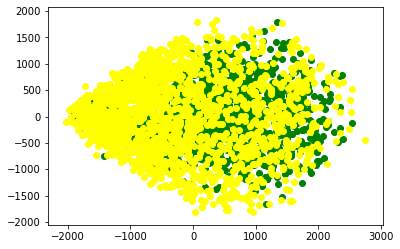

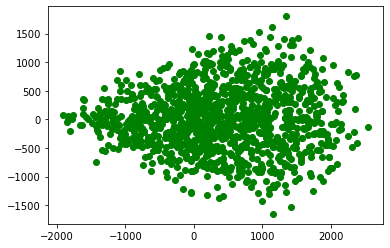

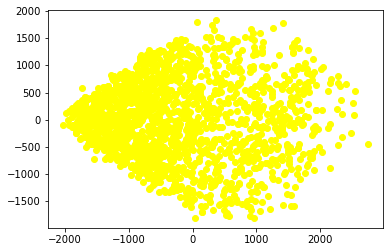

In [11]:
X = np.array(train_Lines)
y = np.array(Y)

ipca = IncrementalPCA(n_components=2, batch_size=10)
ipca.fit(X)

transformed = ipca.transform(X) 

x1 = []
y1 = []
x2 = []
y2 = []

for i in range(len(transformed)):
    if y[i] == 1:
        x1.append(transformed[i][0])
        y1.append(transformed[i][1])
    elif y[i] == -1:
        x2.append(transformed[i][0])
        y2.append(transformed[i][1])
plt.scatter(x1,y1, color='green')
plt.scatter(x2,y2, color='yellow')
plt.show()
plt.scatter(x1,y1, color='green')
plt.show()
plt.scatter(x2,y2, color='yellow')
plt.show()

Part 4.2 <br>
As can be seen from the graph 95% of the variance is explained by 6 dimentions

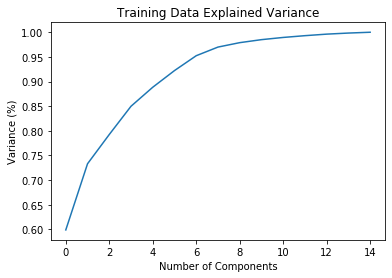

In [12]:

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X[1:, 0:15])


#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Training Data Explained Variance')
plt.show()


Part 4.3 <br>
Using a 6 dimentional approximation of the data as this was shown to explain 95% of the variance. This also trains two classifiers where I have also perform hyperparameter optimization, using a five fold stratified data splitting.

In [13]:

ipca = IncrementalPCA(n_components=6, batch_size=8)
ipca.fit(X)

transformed = ipca.transform(X) 

y = np.array(Y)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(transformed, y)

ac = []
ROC = []
PR = []
print('Kernalized SVM')
for train_index, test_index in skf.split(transformed, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = SVC(C=2.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
                cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', 
                break_ties=False, random_state=None)
    model.fit(X_train, y_train)
    x = model.score(X_test,y_test)
    ac.append(x)
    pred = model.predict(X_test)
    # calculate scores
    auc_roc = roc_auc_score(y_test, pred)
                
    precision, recall, _ = precision_recall_curve(y_test, pred)
    
    ROC.append(auc_roc)
    PR.append(auc(recall, precision))
    
print('Mean accuracy : ', np.mean(ac))
print('Mean AUC_ROC : ', np.mean(ROC))
print('Mean AUC_PR : ', np.mean(PR))
ac = []
ROC = []
PR = []
print('XGBoost')
for train_index, test_index in skf.split(transformed, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = xgb.XGBClassifier()#learning_rate=0.1, max_depth=100, subsample=0.20, colsample_bytree=0.25, n_estimators=100)
    model.fit(X_train, y_train)
    x = model.score(X_test,y_test)
    ac.append(x)
    
    pred = model.predict(X_test)
    # calculate scores
    auc_roc = roc_auc_score(y_test, pred)

    precision, recall, _ = precision_recall_curve(y_test, pred)
    
    ROC.append(auc_roc)
    PR.append(auc(recall, precision))
    
print('Mean accuracy : ', np.mean(ac))
print('Mean AUC_ROC : ', np.mean(ROC))
print('Mean AUC_PR : ', np.mean(PR))

Kernalized SVM
Mean accuracy :  0.7933333333333333
Mean AUC_ROC :  0.7888066446740599
Mean AUC_PR :  0.7911658482109445
XGBoost
Mean accuracy :  0.7946666666666666
Mean AUC_ROC :  0.79168847669233
Mean AUC_PR :  0.7933800995681839


## Part 5

Task 5 <Br>
For this part I have built a classifier based on the top preforming classifiers in the previous parts of this assignment, I have also built a neural network based on the pretrained VGG16 model that has been trained on the ImageNet data base. I have then gone on to fine tune the model on the training data allowing the last 8 layers of the model to be trainable. I have added four trainable layers which classify the images into two categories.
    
<br>
I have benched marked the performance against a pipeline made from the top 5 classifiers from the work in previous parts that shows an accuracy of around 79%. When doing the same type of training data split after training a neural network with 10 epochs the accuracy was 84%, and 86% with 15 epochs reducing the training data size to 50% and 50% testing an accuracy of 79.33% when running 5 epochs. It's possible to get similar results using fewer epochs and thus making the code faster but this is out weighted by the improved accuracy.
    
<br> 
I believe the increase in run time of using this method is justified by the 7% improvement in the accuracy of the classifier.
    
<br> 
When training my classifier that I used to generate my predictions file I ran the network for 15 epochs on all of the available training data. A faster run time could be achieved by using fewer epochs with accuracies still higher than the methods used in the previous parts of this assignment, however as this part is to do with the making of the most accurate classifier, hence I feel justified in using a slower method.


Testing a model based on a combination of the best classifiers.

In [81]:
X = np.array(train_Lines)
y = []
for i in range(len(Y)):
    if Y[i] == -1:
        y.append(0)
    else:
        y.append(1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn_ = []
xg_ = []
g_ = []
f_ = []
svm_ = []
my_=[]

    
print('Training KNN')
knn = KNeighborsClassifier(n_neighbors=35, metric='euclidean')
knn.fit(X_train, y_train)
KNN = knn.predict(X_test)
x=knn.score(X_test,y_test)
knn_.append(x)
print(x)

print('Training XGBoost')
xgn = xgb.XGBClassifier()
xgn.fit(X_train,y_train)
XGN = xgn.predict(X_test)
x=xgn.score(X_test,y_test)
xg_.append(x)
print(x)

print('ada boost')
clf = AdaBoostClassifier(base_estimator=None, n_estimators=34, learning_rate=1.0, algorithm='SAMME.R',
                             random_state=None)
clf.fit(X_train, y_train)
GAUSS = clf.predict(X_test)
x=clf.score(X_test,y_test)
g_.append(x)
print( x)

print('Training Forest')
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                 oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
                                 class_weight=None, ccp_alpha=0.0, max_samples=None)
clf.fit(X_train,y_train)
FOREST = clf.predict(X_test)
x=clf.score(X_test,y_test)
f_.append(x)
print(x)
    
    
print('Kernalized SVM')
model = SVC(kernel='rbf') 
model.fit(X_train, y_train)
SVM = model.predict(X_test)
x=model.score(X_test,y_test)
svm_.append(x)
print(x)


predictions = []    
for i in range(len(KNN)):
    pred = np.mean(KNN[i] + XGN[i] + GAUSS[i] + SVM[i] + FOREST[i])
    if pred < 2.5:
        predictions.append(0)
    else:
        predictions.append(1)


a = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        a +=1 
    my_.append(a/len(y_test))
    
print('knn accuracy',np.mean(knn_))
print('xg accuracy', np.mean(xg_))
print('ada accuracy', np.mean(g_))
print('forest accuracy', np.mean(f_))
print('svm accuracy',np.mean(svm_))
print('My accuracy',np.mean(my_))

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Training KNN
0.7826666666666666
Training XGBoost
0.7746666666666666
ada boost
0.6853333333333333
Training Forest
0.796
Kernalized SVM
0.7893333333333333
My classifier : 0.7893333333333333
knn 0.7826666666666666
xg 0.7746666666666666
ada 0.6853333333333333
forest 0.796
svm 0.7893333333333333
My 0.7893333333333333


Developing the neural network based on the VGG16 model. This first part processes the images for use in the model.

In [36]:
#Loads the data into lists 
X = np.array(train_Lines)
X_test = np.array(test_Lines)
y = []
for i in range(len(Y)):
    if Y[i] == -1:
        y.append(0)
    else:
        y.append(1)
y_train = np.array(y)


# preprocess and reshape data for the model
Images = []
for i in range(len(X)):
    image = X[i]
    image = image.reshape(28,28)
    image = cv2.resize(image.astype('uint8'), (56,56), interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    image = img.reshape(( 56, 56,3))
    # prepare the image for the VGG model
    Images.append(preprocess_input(image))
Images =np.array(Images).astype('float')/255

Creates and compiles the neural network.

In [39]:
#Load the VGG model using the pretrained weights
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(56, 56,3))

# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

#only training 4 layers due to the minimal training data
for layer in model.layers[:-8]:
    layer.trainable = False

# create model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 2050      
Total params: 15,242,050
Trainable params: 15,242,050
Non-trainable params: 0
_________________________________________________________________


This part of the code creates converts the training labels into vectors for use in the model and trains the model on 15 epochs with a batch size of 40.

In [40]:
#creates a one hot encoded vectors
y = []
for i in range(len(Y)):
    if Y[i] == -1:
        y.append(0)
    else:
        y.append(1)
y = np.array(y)
print(len(y))
Yi = []
for i in range(len(X)):
    x = np.zeros(2)
    if y[i] == 1:
        x[0] = 1
    elif y[i] == 0:
        x[1] = 1
    Yi.append(np.array(x))
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Images, Yi, test_size=0.25, random_state=42)

#Coment for testing perposes
X_train = Images 
y_train = Yi


#Trains the model on the training data
model.fit(X_train, np.array(y_train), epochs=15,batch_size=40 ,verbose = 1)


#Uncoment for testing perposes
"""
prediction = model.predict(X_test)
p=[]
for i in range(len(prediction)):
    if prediction[i][0] > prediction[i][1]:
        p.append(1)
    else:
        p.append(0)
        
qqw=[]
for i in range(len(y_test)):
    if y_test[i][0] > y_test[i][1]:
        qqw.append(1)
    else:
        qqw.append(0) 
a=0
print(len(p),len(qqw))
for i in range(len(p)):
    if p[i] == qqw[i]:
        a+=1
print(a/len(p))
"""

3000
Epoch 1/15
  40/3000 [..............................] - ETA: 4:46 - loss: 0.8087 - accuracy: 0.6000

KeyboardInterrupt: 

Preprocesses the testing images, and makes the prediction.


In [10]:
X=np.array(test_Lines)
Images = []
for i in range(len(X)):
    image = X[i]
    image = image.reshape(28,28)
    image = cv2.resize(image.astype('uint8'), (56,56), interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    image = img.reshape(( 56, 56,3))
    # prepare the image for the VGG model
    Images.append(preprocess_input(image))
Images =np.array(Images).astype('float')/255

In [11]:
#Predicts what the image is.
prediction = model.predict(Images)        

This code decodes the predictions and writes the prediction in to a file 

In [13]:
file = open('u1604827.csv', 'w+')

pred=[]
for i in range(len(prediction)):
    #Picks the larger of the two values for the predictions i.e [0.8, 0.2] becomes a one and 
    if prediction[i][0] > prediction[i][1]:
        pred.append(1)
        file.write('1\n')
    else:
        pred.append(0) 
        file.write('0\n')
print(len(pred))        


5000
